# Agent Performance Analysis

This notebook analyzes the performance of three agents (Beginner, Normal, Expert) based on the CSV logs generated by the Unity simulation.

It visualizes:
- Difficulty Progression
- Performance Metrics (Attempts, Backtracks, NearSolves, Resets, TimeTaken)
- Genetic Algorithm Stats (GATime, BestFitness)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set plot style
plt.style.use('ggplot')

# Define file paths
base_path = r"e:\MyData\MyGames\Metaheuristic-Final\Assets"
files = {
    "Beginner": os.path.join(base_path, "map_records_BeginnerAgent.csv"),
    "Normal": os.path.join(base_path, "map_records_NormalAgent.csv"),
    "Expert": os.path.join(base_path, "map_records_ExpertAgent.csv")
}

def load_agent_data(filepath):
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return None
    
    # Read CSV, skipping lines that start with '#' (map data)
    # We can use comment='#' in read_csv, but our map data lines start with '# '
    # The header is standard CSV, so comment='#' should work fine if the map lines start with #
    try:
        df = pd.read_csv(filepath, comment='#')
        return df
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None

data = {}
for name, path in files.items():
    df = load_agent_data(path)
    if df is not None:
        data[name] = df
        print(f"Loaded {name}: {len(df)} records")

Loaded Beginner: 15 records
Loaded Normal: 15 records
Loaded Expert: 14 records


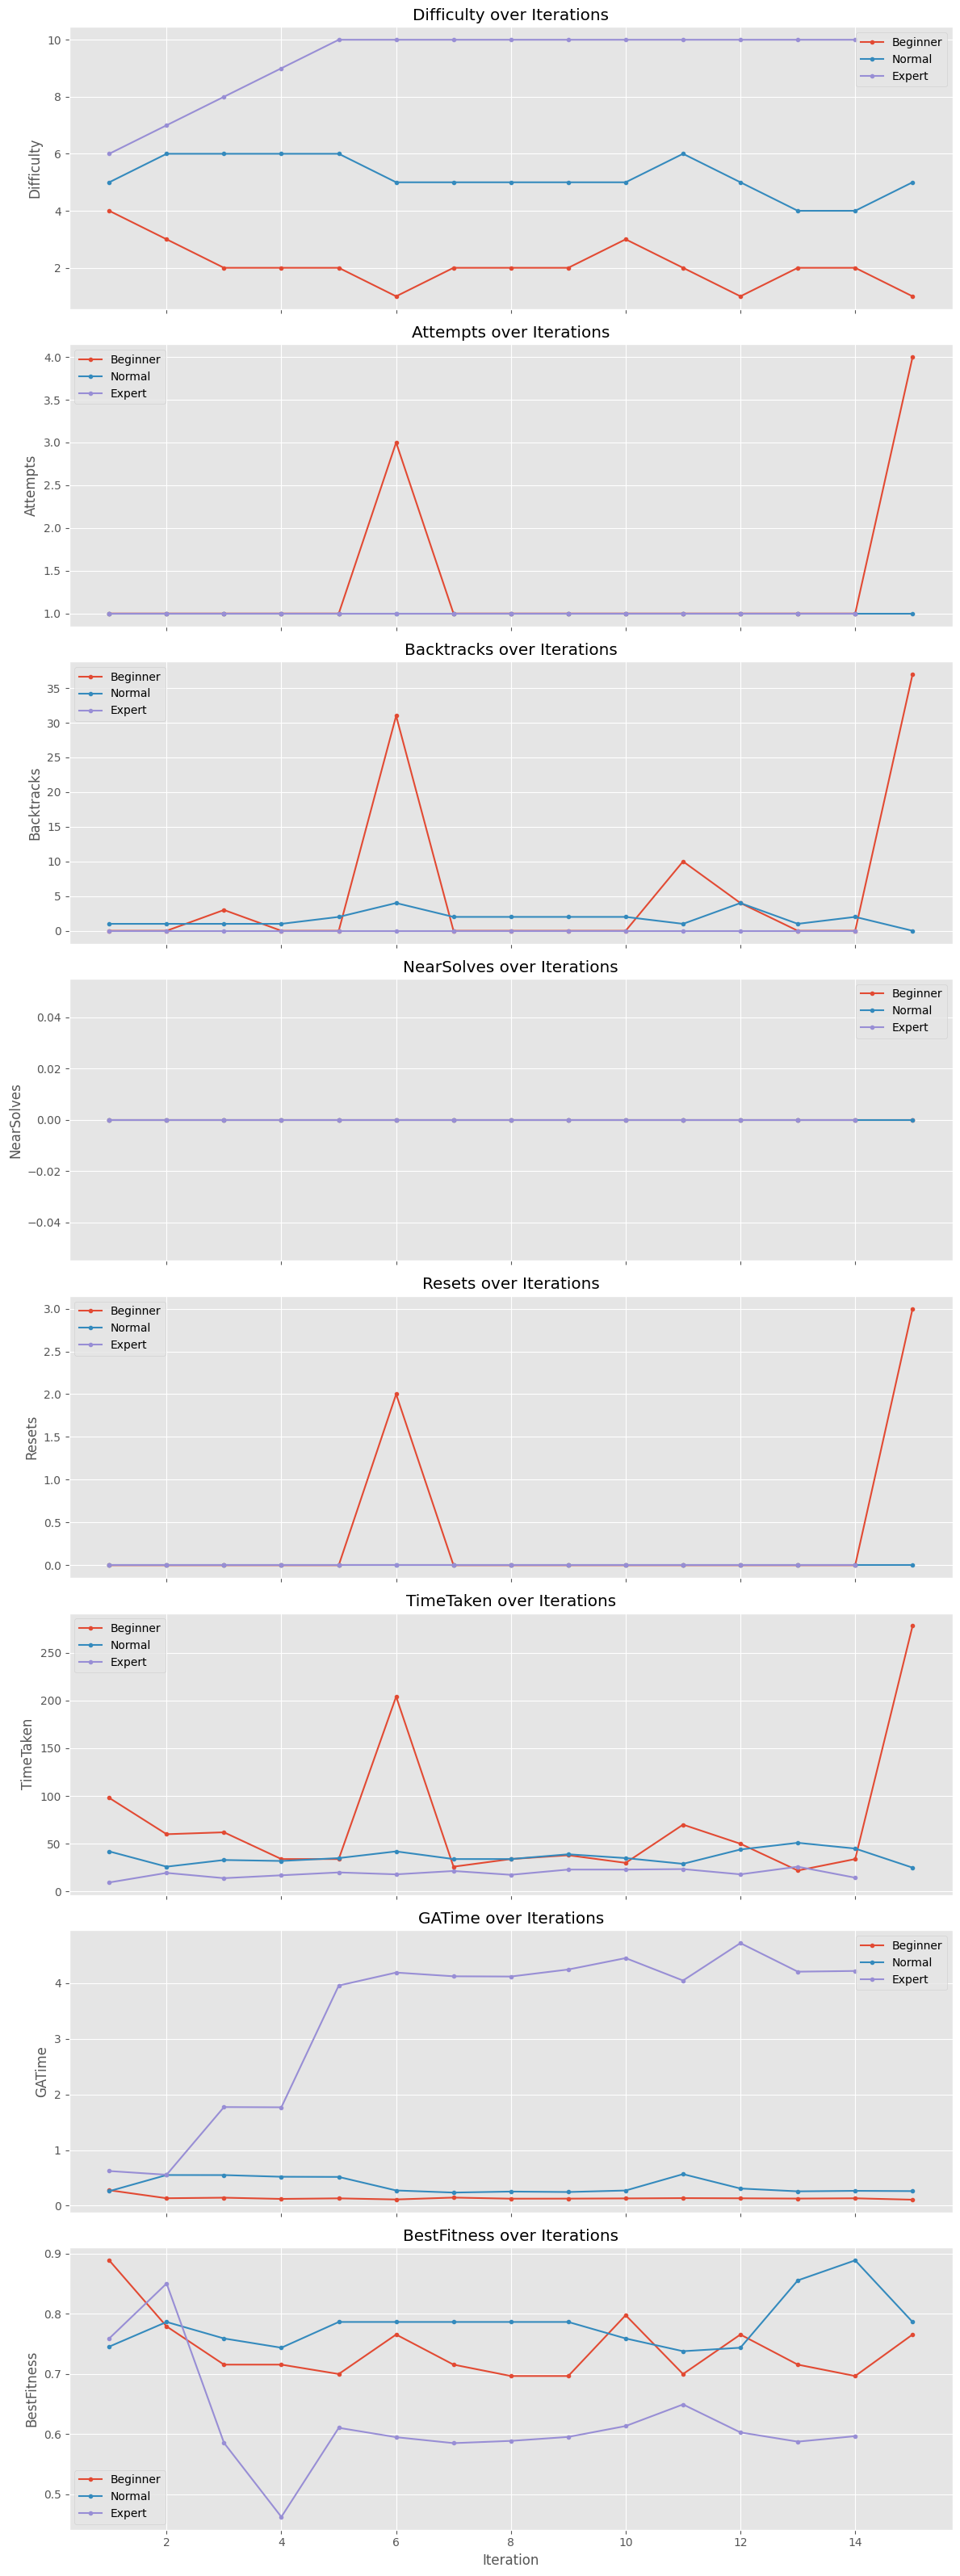

In [6]:
def plot_metrics(data_dict):
    metrics = [
        'Difficulty', 'Attempts', 'Backtracks', 'NearSolves', 
        'Resets', 'TimeTaken', 'GATime', 'BestFitness'
    ]
    
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4 * len(metrics)), sharex=True)
    
    if len(metrics) == 1:
        axes = [axes]
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        for agent_name, df in data_dict.items():
            if metric in df.columns:
                ax.plot(df['Iteration'], df[metric], label=agent_name, marker='o', markersize=3)
        
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} over Iterations')
        ax.legend()
        ax.grid(True)
        
    plt.xlabel('Iteration')
    plt.tight_layout()
    plt.show()

if data:
    plot_metrics(data)
else:
    print("No data loaded to plot.")